In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('new_data.csv')

In [3]:
data.isFlaggedFraud.value_counts()

isFlaggedFraud
0    1048575
Name: count, dtype: int64

In [4]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
data.type.value_counts()

type
CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: count, dtype: int64

In [6]:
type=data['type'].value_counts()

In [7]:
transactions=type.index

In [8]:
quantity=type.values

In [9]:
import plotly.express as px
px.pie(data,values=quantity,names=transactions,hole=0.4,title="Distribution of Transaction Type")

In [10]:
data = pd.get_dummies(data, columns=['type'], prefix='', prefix_sep='')
data = data.rename(columns={'CASH_OUT': 'type_CASH_OUT', 'CASH_IN': 'type_CASH_IN', 'DEBIT': 'type_DEBIT', 'PAYMENT': 'type_PAYMENT', 'TRANSFER': 'type_TRANSFER'})
print(data)

         step     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0           1    9839.64  C1231006815      170136.00       160296.36   
1           1    1864.28  C1666544295       21249.00        19384.72   
2           1     181.00  C1305486145         181.00            0.00   
3           1     181.00   C840083671         181.00            0.00   
4           1   11668.14  C2048537720       41554.00        29885.86   
...       ...        ...          ...            ...             ...   
1048570    95  132557.35  C1179511630      479803.00       347245.65   
1048571    95    9917.36  C1956161225       90545.00        80627.64   
1048572    95   14140.05  C2037964975       20545.00         6404.95   
1048573    95   10020.05  C1633237354       90605.00        80584.95   
1048574    95   11450.03  C1264356443       80584.95        69134.92   

            nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
0        M1979787155            0.00            0.00  

In [11]:
data = data.drop('isFlaggedFraud', axis = 1)

In [12]:
x=data.drop(['isFraud','step', 'amount', 'nameOrig', 'nameDest'], axis = 1)

In [13]:
y=data['isFraud']

In [14]:
class_1_data = data[data['isFraud'] == 1]
class_2_data = data[data['isFraud'] == 0].sample(n=1500, random_state=42)
final_data = pd.concat([class_1_data, class_2_data])
final_data = final_data.reset_index(drop=True)

In [15]:
x = final_data.drop(['isFraud','step', 'amount', 'nameOrig', 'nameDest'],axis=1)

In [16]:
y = final_data['isFraud']

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

Accuracy Score:  95.08506616257088
Precision Score:  96.01769911504425
F1 Score:  94.34782608695652
Recall Score:  92.73504273504274


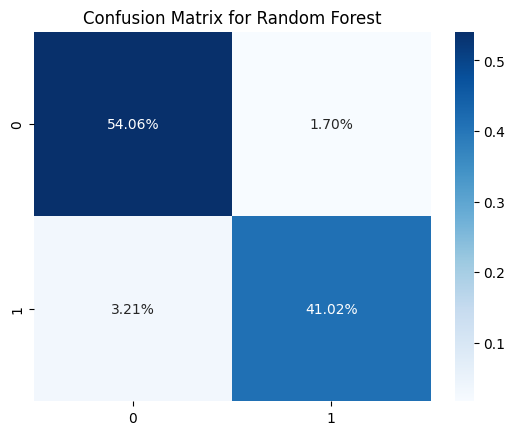

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)
Ypred = rfc.predict(xtest)

mat = confusion_matrix(ytest, Ypred)
sns.heatmap(mat/np.sum(mat), annot=True, fmt=".2%", cmap = "Blues")
plt.title("Confusion Matrix for Random Forest")


rfacc = accuracy_score(ytest, Ypred)
rfprec = precision_score(ytest, Ypred)
rff1 = f1_score(ytest, Ypred)
rfrecall = recall_score(ytest, Ypred)
print("Accuracy Score: ", rfacc*100)
print("Precision Score: ", rfprec*100)
print("F1 Score: ", rff1*100)
print("Recall Score: ", rfrecall*100)

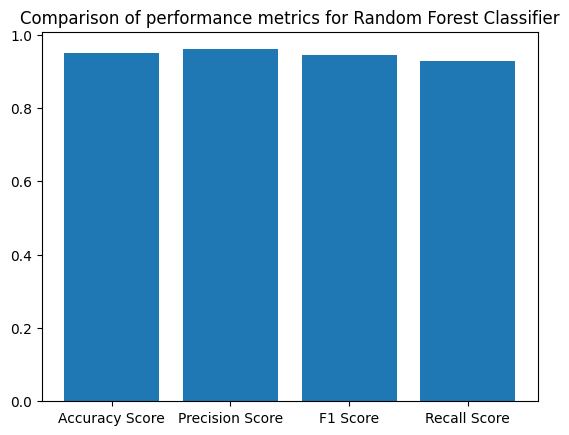

In [19]:
c_x = np.array(["Accuracy Score", "Precision Score", "F1 Score","Recall Score"])
c_y = np.array([rfacc, rfprec, rff1, rfrecall])
plt.bar(c_x, c_y)
plt.title("Comparison of performance metrics for Random Forest Classifier")
plt.show()

Accuracy Score:  93.19470699432893
Precision Score:  93.42105263157895
F1 Score:  92.20779220779221
Recall Score:  91.02564102564102


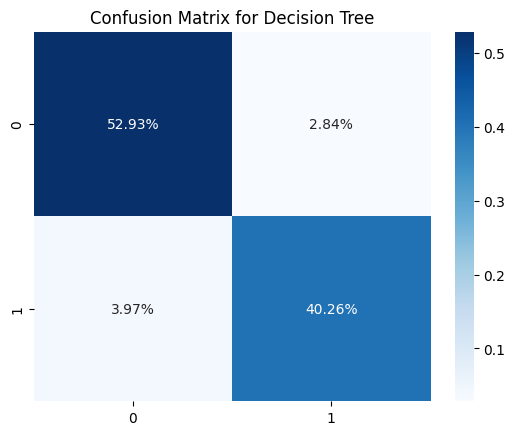

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt =DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
dtYpred = dt.predict(xtest)

dtmat = confusion_matrix(ytest, dtYpred)
sns.heatmap(dtmat/np.sum(dtmat), annot=True, fmt=".2%", cmap = "Blues")
plt.title("Confusion Matrix for Decision Tree")


dtacc = accuracy_score(ytest, dtYpred)
dtprec = precision_score(ytest, dtYpred)
dtf1 = f1_score(ytest, dtYpred)
dtrecall = recall_score(ytest, dtYpred)
print("Accuracy Score: ", dtacc*100)
print("Precision Score: ", dtprec*100)
print("F1 Score: ", dtf1*100)
print("Recall Score: ", dtrecall*100)

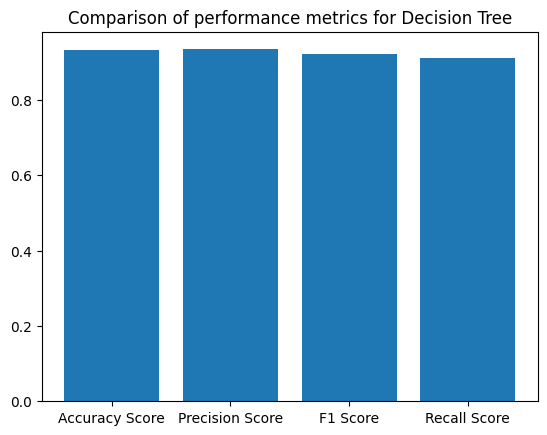

In [21]:
c_x = np.array(["Accuracy Score", "Precision Score", "F1 Score","Recall Score"])
c_y = np.array([dtacc, dtprec, dtf1, dtrecall])
plt.bar(c_x, c_y)
plt.title("Comparison of performance metrics for Decision Tree")
plt.show()

Accuracy Score:  91.49338374291115
Precision Score:  93.95348837209302
F1 Score:  89.97772828507794
Recall Score:  86.32478632478633


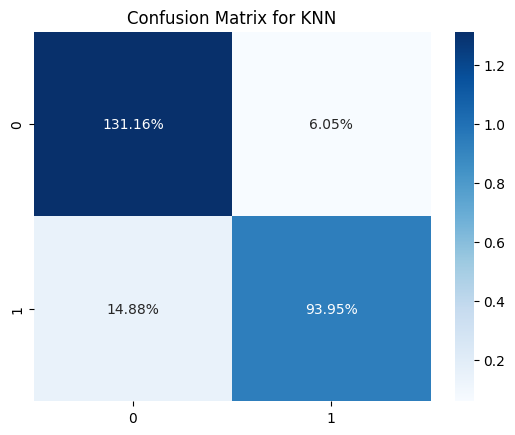

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)
knnYpred = knn.predict(xtest)

knnmat = confusion_matrix(ytest, knnYpred)
sns.heatmap(knnmat/np.sum(knnYpred), annot=True, fmt=".2%", cmap = "Blues")
plt.title("Confusion Matrix for KNN")


knnacc = accuracy_score(ytest, knnYpred)
knnprec = precision_score(ytest, knnYpred)
knnf1 = f1_score(ytest, knnYpred)
knnrecall = recall_score(ytest, knnYpred)
print("Accuracy Score: ", knnacc*100)
print("Precision Score: ", knnprec*100)
print("F1 Score: ", knnf1*100)
print("Recall Score: ", knnrecall*100)

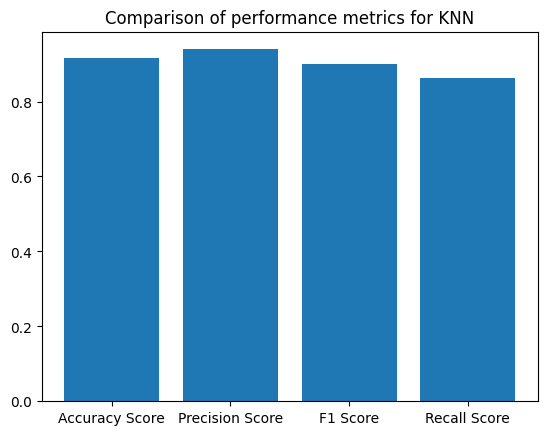

In [23]:
c_x = np.array(["Accuracy Score", "Precision Score", "F1 Score","Recall Score"])
c_y = np.array([knnacc, knnprec, knnf1, knnrecall])
plt.bar(c_x, c_y)
plt.title("Comparison of performance metrics for KNN")
plt.show()

Accuracy Score:  76.55954631379961
Precision Score:  99.10714285714286
F1 Score:  64.16184971098266
Recall Score:  47.43589743589743


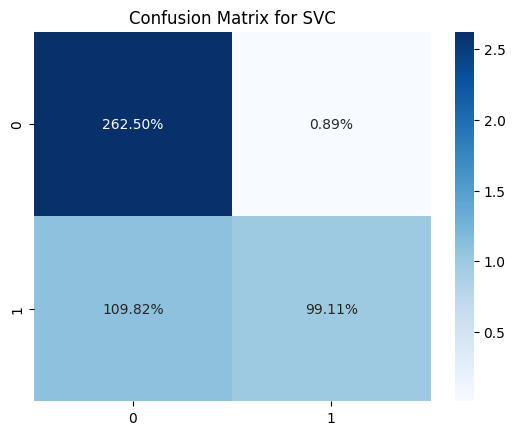

In [24]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(xtrain, ytrain)
svcYpred = svc.predict(xtest)

svcmat = confusion_matrix(ytest, svcYpred)
sns.heatmap(svcmat/np.sum(svcYpred), annot=True, fmt=".2%", cmap = "Blues")
plt.title("Confusion Matrix for SVC")


svcacc = accuracy_score(ytest, svcYpred)
svcprec = precision_score(ytest, svcYpred)
svcf1 = f1_score(ytest, svcYpred)
svcrecall = recall_score(ytest, svcYpred)
print("Accuracy Score: ", svcacc*100)
print("Precision Score: ", svcprec*100)
print("F1 Score: ", svcf1*100)
print("Recall Score: ", svcrecall*100)

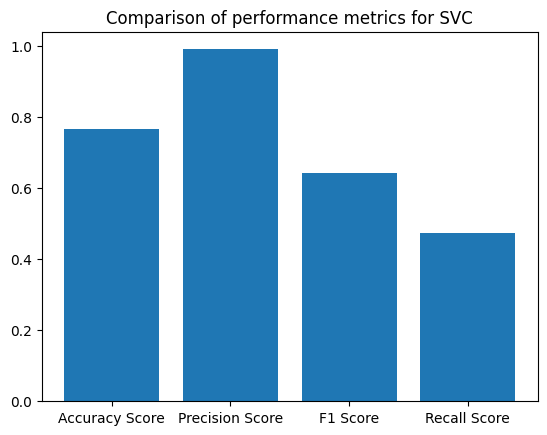

In [25]:
c_x = np.array(["Accuracy Score", "Precision Score", "F1 Score","Recall Score"])
c_y = np.array([svcacc, svcprec, svcf1, svcrecall])
plt.bar(c_x, c_y)
plt.title("Comparison of performance metrics for SVC")
plt.show()

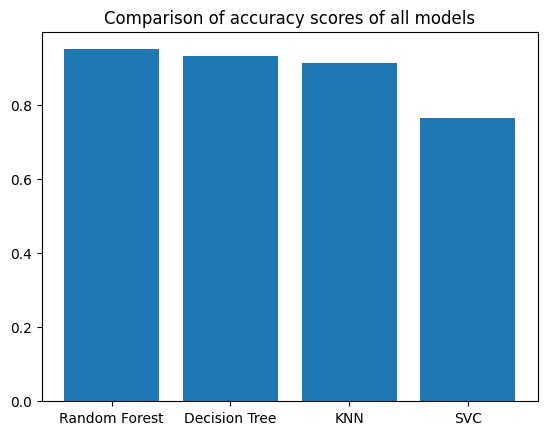

In [26]:
acc_x = np.array(["Random Forest", "Decision Tree", "KNN", "SVC"])
acc_y = np.array([rfacc, dtacc,knnacc, svcacc])
plt.bar(acc_x, acc_y)
plt.title("Comparison of accuracy scores of all models")
plt.show()

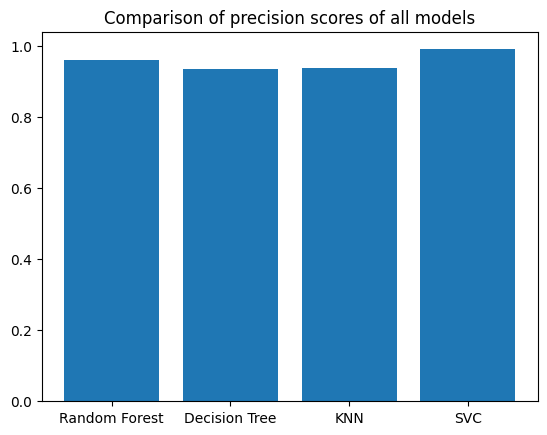

In [27]:
prec_x = np.array(["Random Forest", "Decision Tree", "KNN", "SVC"])
prec_y = np.array([rfprec, dtprec,knnprec, svcprec])
plt.bar(prec_x, prec_y)
plt.title("Comparison of precision scores of all models")
plt.show()